# 投资组合管理概论
## 组合投资方法
组合投资的观点是，投资者在评估单个投资时，要基于它对于整个投资组合风险和收益的贡献来进行评价。现在资产组合理论认为，由于持有一只股票二产生的额外风险，并没有从预期的投资收益中得到补偿。而相反，多样化的投资方法使得投资者可以在不减少投资组合预期回报率的同时，降低投资组合的风险。
>20世纪50年代，马科维茨，采用投资收益的标准差测量投资风险，得出结论：除非风险资产相互完全正相关，否则，风险会由于资产的多样化组合而被降低

>20世纪60年底，特雷纳、夏普、莫森、林特纳，扩展上述模型，形成了目前的现代资产组合理论（MPT）
## 投资者类型和不同特点及需求

|投资者|风险容忍度|投资期限|流动性需求|收入需求|
|:-|-|-|-|-|
|个人投资者|因人而异|因人而异|因人而异|因人而异|
|企业年金计划|低|长|低|按工龄|
|捐赠基金|高|长|低|支出需求|
|银行|低|短|高|支付存款利息|
|保险公司|低|人寿保险-长<br>财产保险-短|高|低|
|共同基金|因基金而定|因基金而定|高|因基金而定|
|主权财富基金|低|长|长|保值增值|

## 投资组合管理的步骤
1. 计划：投资者个人情况分析，包括：风险承受度、收益目标、投资期限、税收状况、流动性需求、收入需求以及其他和投资者偏好，形成投资政策文件(IPS)
2. 执行：资产配置：分散到不同的品种上，包括：现金、固定收益证券、可交易证券、对冲基金、私募基金、房地产、大宗商品、另类投资
3. 动态平衡：调整

>共同基金（国内公募基金）:
1. 货币市场基金
2. 债券基金
3. 股票基金（指数型、主动管理型）
4. ETF
5. 单一客户资产管理计划
6. 对冲基金（长短仓、市场中性、偏离型、事件驱动型、可转换债券套利、环球宏观）
7. 收购基金
8. 风险投资基金(VC-venture capital funds)

# 证券投资组合风险和收益
## 收益率
持有期收益率(HPR)是投资价值在一段时间的增长百分比。
>$HPR=\frac{期末价值}{期初价值}-1$

平均收益率包括算术平均收益率和几何平均收益率。
>$算数平均收益率=\frac{\sum_i^n{R_i}}{n}$<br>
$几何平均收益率={[(1+R_1)\times\dots\times(1+R_n)]}^{\frac{1}{n}}-1$

货币加权平均收益率，是投资组合，基于全部的现金流入和流出，对应的内部收益率(IRR)。其中初始价值和额外投资作为流入部分，投资收回、配发利息、股利和期末价值作为流出部分。

总收益，指在扣除管理费用之前投资账户组合的收益。

净收益，指在扣除管理费用之后投资账户组合的收益。**注**（交易佣金和其他必要费用已在总收益和净收益中扣除）

税前名义收益，指在缴税前的收益。股利收益、利息收益、短期资本收益和长期资本收益都将以不同比例课税。

税后名义收益，指缴税后的收益。

实际收益率，指调整通货膨胀后的收益率。

杠杆收益率，指投资者在标的资产的基础上使收益率发生乘数效应。

## 收益率的方差（标准差）
收益率的方差和标准差是衡量投资风险的一般手段，衡量收益率距离其均值或预期值的偏离分布情况。
>$\sigma^2=\frac{\sum_{t=1}^{T}{(R_t-\mu)}^2}{T}\to(总体方差)\\\bar{R}=\frac{\sum_{t=1}^{T}{R_t}}{T}\\S^2=\frac{\sum_{t=1}^{T}{(R_t-\bar R)}^2}{T-1}\to(样本方差)$

In [1]:
%matplotlib inline
import tushare as ts
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体,用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题

比较总体方差和样本方差的区别

In [2]:
values=range(1,6)
list(values),np.var(a=values,ddof=0),np.var(a=values,ddof=1)

([1, 2, 3, 4, 5], 2.0, 2.5)

In [3]:
date_end=datetime.datetime.now()
date_start=date_end+datetime.timedelta(days=-20)
sz50=ts.get_h_data(code="000016",start=date_start.strftime("%Y-%m-%d"),end=date_end.strftime("%Y-%m-%d"),index=True)

[Getting data:]#

In [4]:
sz50.sort_index(inplace=True)
sz50.head()

,open,high,close,low,volume,amount
date,,,,,,
2019-06-17,2785.473,2813.445,2793.704,2785.473,2047785100,29172434999
2019-06-18,2800.830,2809.866,2806.454,2785.381,2167640400,28833695211
2019-06-19,2872.073,2879.235,2842.736,2842.424,4116011000,61700813912
2019-06-20,2847.317,2954.033,2942.629,2846.435,5736036900,87264861450
2019-06-21,2939.648,2958.227,2938.773,2929.903,4656020500,68751725117


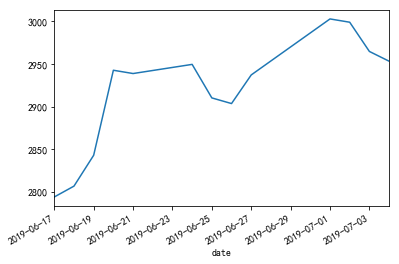

In [5]:
sz50.close.plot()

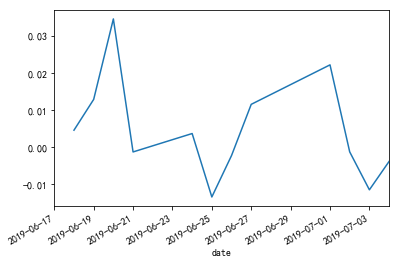

In [6]:
sz50_close_ret=np.log(sz50/sz50.shift(1)).close
sz50_close_ret.plot()

In [7]:
sz50_close_ret.var(ddof=1),sz50_close_ret.std(ddof=1)

(0.0001905030386826756, 0.013802283821262175)

## 协方差和相关系数
协方差是用来衡量多变量在何种程度上同向移动。正的协方差表示变量（证券的投资收益率）同向变动；负的表示变量反向运动。协方差为0表示两个变量间没有线性关系。
>$Cov_{1,2}=\frac{\sum_{t=1}^n[(R_{t,1}-\bar{R_1})((R_{t,2}-\bar{R_2})]}{n-1}$

收益协方差可以通过分离两种证券标准差来标准化，对应的就是相关系数，公式如下：
>$\rho_{1,2}=\frac{Cov_{1,2}}{\sigma_1\sigma_2}$

相关系数为+1，表示两个变量同向成比例运动，即是完全正相关。

相关系数为-1，表示两个变量反向成比例运动，即是完全负相关。

相关系数为 0，表示两个变量之间没有线性关系，是不相关的。

In [8]:
zxbz=ts.get_h_data(code="399005",start=date_start.strftime("%Y-%m-%d"),end=date_end.strftime("%Y-%m-%d"),index=True)

[Getting data:]#

In [9]:
hssb=ts.get_h_data(code="399300",start=date_start.strftime("%Y-%m-%d"),end=date_end.strftime("%Y-%m-%d"),index=True)

[Getting data:]#

In [10]:
zxbz.sort_index(inplace=True),hssb.sort_index(inplace=True)
zxbz.head()

,open,high,close,low,volume,amount
date,,,,,,
2019-06-17,5419.509,5446.583,5393.208,5379.225,1509677287,20902260227
2019-06-18,5396.797,5430.404,5413.438,5359.892,1417710016,20428672340
2019-06-19,5589.792,5611.353,5514.639,5513.557,2612944467,38772420386
2019-06-20,5510.730,5667.504,5632.948,5494.206,2939023911,39888316444
2019-06-21,5641.233,5717.100,5688.935,5640.778,2946567411,40749266885


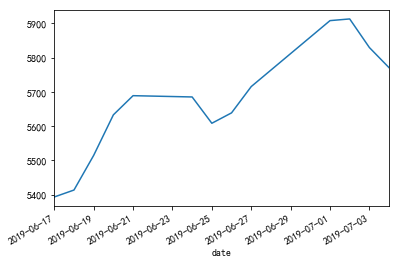

In [11]:
zxbz.close.plot()

In [12]:
closes=pd.DataFrame({"上证50":sz50.close,"中小板指":zxbz.close,"沪深三百":hssb.close})

In [13]:
closes.head()

,上证50,中小板指,沪深三百
date,,,
2019-06-17,2793.704,5393.208,3654.825
2019-06-18,2806.454,5413.438,3667.618
2019-06-19,2842.736,5514.639,3715.938
2019-06-20,2942.629,5632.948,3828.518
2019-06-21,2938.773,5688.935,3833.938


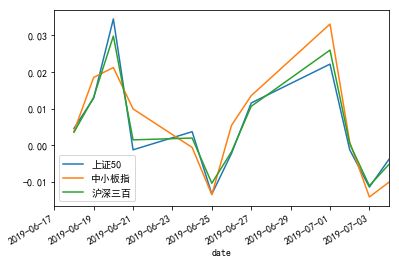

In [14]:
closes_ret=np.log(closes/closes.shift(1))
closes_ret.plot()

In [15]:
rets=closes_ret.mean(axis=0)
rets

上证50    0.004629
中小板指    0.005636
沪深三百    0.004834
dtype: float64

In [16]:
vars=closes_ret.var(axis=0,ddof=1)
vars

上证50    0.000191
中小板指    0.000211
沪深三百    0.000168
dtype: float64

In [17]:
cov=closes_ret.cov()
cov

,上证50,中小板指,沪深三百
上证50,0.000191,0.000175,0.000177
中小板指,0.000175,0.000211,0.000175
沪深三百,0.000177,0.000175,0.000168


In [18]:
closes_ret.corr()

,上证50,中小板指,沪深三百
上证50,1.000000,0.870764,0.986026
中小板指,0.870764,1.000000,0.927009
沪深三百,0.986026,0.927009,1.000000


## 投资组合的标准差
两种风险投资组的收益方差
>$Var_{portfolio}=w_1^2\sigma_1^2+w_2^2\sigma_2^2+2\rho_{12}\sigma_1\sigma_2w_1w_2\\\sigma_{portfolio}=\sqrt{w_1^2\sigma_1^2+w_2^2\sigma_2^2+2\rho_{12}\sigma_1\sigma_2w_1w_2}$

如果两种风险资产收益完全正相关：
>$\sigma_{portfolio}=\sqrt{w_1^2\sigma_1^2+w_2^2\sigma_2^2+2\rho_{12}\sigma_1\sigma_2w_1w_2}=|(w_1\sigma_1+w_2\sigma_2)|$

如果两种风险资产收益完全负相关：
>$\sigma_{portfolio}=\sqrt{w_1^2\sigma_1^2+w_2^2\sigma_2^2+2\rho_{12}\sigma_1\sigma_2w_1w_2}=|(w_1\sigma_1-w_2\sigma_2)|$

## 演示

In [19]:
def ff(r1,r2,s1,s2,rho):
    """
    r1,s1:序列1的收益率,标准差
    r2,s2:序列1的收益率,标准差
    rho:两个序列的相关系数
    retrun: 不同权重配比下，对应的投资组合的收益率和标准差
    """
    return np.array([[r1*w+r2*(1-w),((s1*w)**2+(s2*(1-w))**2+2*rho*s1*s2*w*(1-w))**(1/2)] for w in np.linspace(0,1,num=20)])

In [20]:
r1,r2,s1,s2=.05,.1,.025,.05

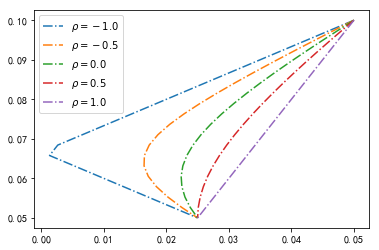

In [21]:
for i in np.linspace(-1,1,5):
    rs=ff(r1,r2,s1,s2,i)
    plt.plot(rs[:,1],rs[:,0],"-.",label=r"$\rho={0}$".format(i))
plt.legend()

## 有效边界-蒙特卡洛法

In [22]:
rets=closes_ret.mean(axis=0)*250
cov=closes_ret.cov()*250

In [23]:
rets

上证50    1.157196
中小板指    1.408914
沪深三百    1.208490
dtype: float64

In [24]:
# 蒙特卡洛寻找有效边界
def ff(ws):
    ws/=np.sum(ws)
    xret=np.dot(ws,rets)
    xstd=np.sqrt(np.dot(np.dot(ws,cov),ws.T))    
    return xret,xstd,xret/xstd
values=np.array([ff(np.random.random(rets.shape))for _ in range(10000)])


> 有效边界是方差最小的边界<br>同等风险选择收益较大的组合<br>同等收益选择风险较小的组合

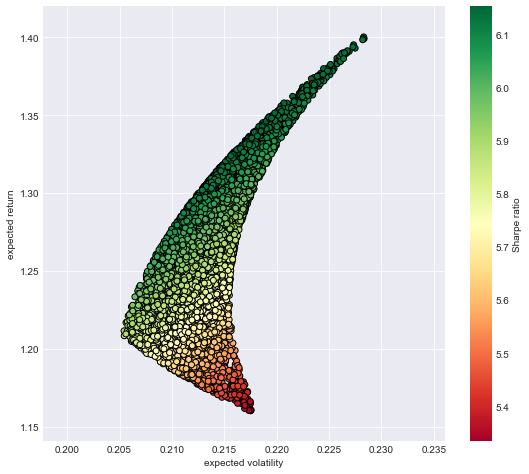

In [25]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(9, 8))
plt.scatter(values[:,1], values[:,0], c=values[:,2],cmap='RdYlGn', edgecolors='black',marker='o') 
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

## 有效边界-马科维茨-均值方差法

>$Var\\=w_1^2\sigma_1^2+w_2^2\sigma_2^2+2\rho_{12}\sigma_1\sigma_2w_1w_2\\=\begin{bmatrix}w_1&w_2\end{bmatrix}\begin{bmatrix}\sigma_1^2&\rho_{12}\sigma_1\sigma_2\\\rho_{12}\sigma_1\sigma_2&\sigma_2^2\end{bmatrix}\begin{bmatrix}w_1\\w_2\end{bmatrix}\\=w^TCw\\\\\sigma=\sqrt{Var}\\\mu=E(R)\times w$

In [26]:
# 引入cvxopt凸优化库
import cvxopt as cxp

>$minimize:\frac{1}{2}w^T*C*w-er*w\\subject to:\\权重都大于零\\权重和等于1\\组合收益等于目标收益$

In [27]:
# 帮助
# cxp.solvers.qp?
# 马科维茨-均值方差法
def qp(cov,rets,mu):
    n=rets.size
    P=cxp.matrix(cov.values)#方差协方差矩阵
    q=cxp.matrix(rets.values)#平均收益序列
    G=cxp.matrix(-np.eye(n))
    h=cxp.matrix(0.0, (n, 1))# 权重都大于等于零
    A=cxp.matrix(np.vstack((np.ones((1,n)),rets.values)))
    b=cxp.matrix([1,mu])# 权重和等于1，且组合收益等于指定收益
    x=cxp.solvers.qp(P,-q,G,h,A,b,options={"show_progress":False})["x"]# 求解
    return np.sqrt(cxp.blas.dot(x,P*x)),mu# 返回组合标准差和组合收益

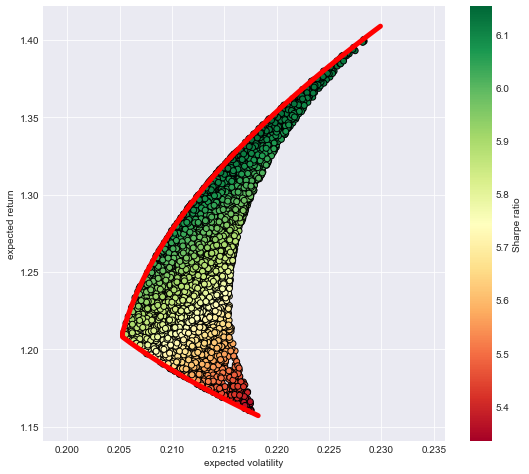

In [28]:
# 有效边界
# 蒙特卡洛法
plt.style.use('seaborn-dark')
plt.figure(figsize=(9, 8))
plt.scatter(values[:,1], values[:,0], c=values[:,2],cmap='RdYlGn', edgecolors='black',marker='o') 
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# 均值方差法
fronter=pd.DataFrame([qp(cov,rets,mu) for mu in np.linspace(min(rets.values),max(rets.values),100)],columns=["sigma","mu"])
plt.plot(fronter.sigma,fronter.mu,"r",linewidth=5)

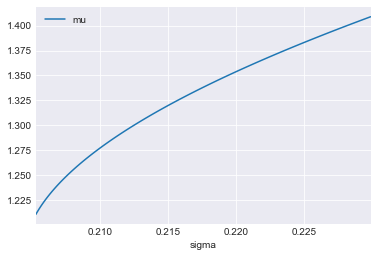

In [29]:
# 有效边界过滤
fronter_e=fronter.loc[fronter.mu>=fronter.loc[fronter.sigma==fronter.sigma.min(),:].mu.values[0],:]
fronter_e.plot(x="sigma",y=["mu"],grid=True)

## 无差异曲线
>无差异曲线是经济学中的一个概念，它是指这样一条曲线，在它上面的每一点，商品的组合是不同的，但是，它表示人们从中得到的效用程度却是相同的，即，如果听任消费者对曲线上的点作选择，那么，所有的点对他都是同样可取的，因为任一点所代表的组合给他所带来的满足都是无差异的。

无差异曲线的特点：
>1. 对于投资者来说，无差异曲线表示投资者对于风险和收益的匹配偏好，且对于风险的收益边际要求是递增的
2. 风险厌恶者相对于积极性投资者对于风险的边际收益要求更高，表现在无差异曲线更陡峭
2. 对于单个投资者，存在多条并行的无差异曲线，左边的优于右边（同等收益风险低，同等风险收益高）
3. 对于投资者来说，在特点资产组合上，只有一条最优且可执行

In [30]:
# 使用sympy
import sympy as sp

In [31]:
a,b,mu,sigma=sp.symbols('a,b,mu,sigma',real=True)

In [32]:
# 无差异曲线期望收益的方程式
expr_ic=a*sp.E**sigma+b
expr_ic

a*exp(sigma) + b

In [33]:
# 无差异曲线标准差和收益等式
expr_ic_eq=sp.Eq(expr_ic,mu)
expr_ic_eq

Eq(a*exp(sigma) + b, mu)

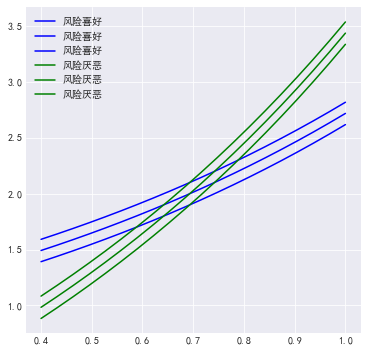

In [34]:
plt.figure(figsize=(6,6))
plt.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体,用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题
xp=.1

xa=expr_ic.subs([(a,1),(b,0)])
xb=np.linspace(0.4,1,20)
xc=np.vstack((xb,[sp.lambdify(sigma,xa+i,"numpy")(xb) for i in np.linspace(-xp,xp,3)])).T
plt.plot(xc[:,0],xc[:,1:],"b",label="风险喜好")

xa=expr_ic.subs([(a,2),(b,-2)])
xb=np.linspace(0.4,1,20)
xc=np.vstack((xb,[sp.lambdify(sigma,xa+i,"numpy")(xb) for i in np.linspace(-xp,xp,3)])).T
plt.plot(xc[:,0],xc[:,1:],"g",label="风险厌恶")

plt.grid()
plt.legend()
plt.show()

## 分离定理
>分离定理指在投资组合中可以以无风险利率自由借贷的情况下，投资人选择投资组合时都会选择无风险资产和风险投资组合的得最优组合点，因为这一点相对于其他的投资组合在风险上或是报酬上都具有优势。所以谁投资都会都会选择这一点。投资人对风险的态度，只会影响投入的资金数量，而不会影响最优组合点。

引入无风险资产，组合投资包括之前得到的风险投资组合和无风险资产。
>$E(R_p)=w_fR_f+w_mE(R_m)\\\sigma=\sqrt{w_f^2\sigma_f^2+w_m^2\sigma_m^2+2w_fw_m\rho_{mf}\sigma_m\sigma_f}\\\because\sigma_f=0,\rho_{mf}=0\\\therefore\sigma=w_m\sigma_m\\E(R_p)=R_f+\left[\frac{(E(R_m)-R_f)}{\sigma_m}\right]\sigma_p$

所以，风险投资组合和无风险资产组成的投资组合，是一个风险和收益的线性函数。

## 资产配置线（CAL）
CAL，是能够表现投资组合和收益相结合的所有情况。对于个人投资者，依据其风险和收益，资产配置线提供了一系列最好的投资组合。

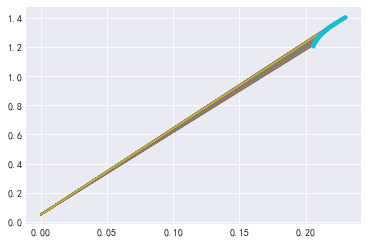

In [35]:
# CAL
rf=.05
for i in fronter_e.values:
    plt.plot([0,i[0]],[rf,i[1]])
plt.plot(fronter_e.sigma,fronter_e.mu,'.')
plt.grid()

## 资产市场线（CML）
现代投资组合理论假设，投资者对风险投资的收益、标准差和相关性都拥有同样的预期。在该假设下，所有投资者有着相同的由风险资产组合组成的有效前沿，且会选择相同的最优风险组合和资产配置线(**相同收益风险最小，相同风险收益最大原则**)。此时最优资产配置线和有效边界（有效前沿）相切（或资产配置线斜率最大），不同投资者基于不同的无差异曲线，选择不同的无风险资产和风险投资组合比例（**风险投资组合配置比例完全相同**）。最有资产配置线叫做资产市场线（CML）。



In [36]:
i=fronter_e.iloc[-1,:].values#斜率最大有效前沿组合点
cml_b=(i[1]-rf)/i[0]
expr_cml=rf+cml_b*sigma
expr_cml

5.91079035438884*sigma + 0.05

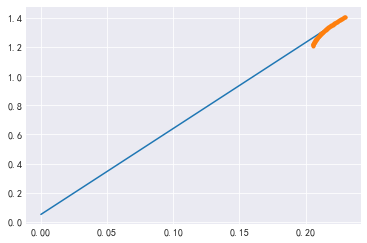

In [37]:
plt.plot([0,i[0]],[rf,i[1]])
plt.plot(fronter_e.sigma,fronter_e.mu,'.')
plt.grid()

## CML和无差异曲线
<img width="50%" align="left" src="images/cml+indiff curve.PNG">

## 系统性风险和非系统性风险
投资者投资于不完全相关的多种资产，组合的风险要比组合内单只资产的加权平均风险小。被多元化综合掉的风险叫做非系统性风险。市场投资组合包括多种风险资产，所以必须是一个多元化的组合。不能被多元化投资综合掉的风险叫做系统性风险。

资本市场理论的一个重要结论是：证券投资收益取决于系统性风险，即假设条件是非系统性风险为0。这个假设建立在，投资者不会从能够免费消除的风险中获得收益。这个结论对于资产定价（预期收益）非常重要。

总之， 一个投资组合的预期收益取决于它的系统性风险。

## 因素模型
因素模型是基于因素评估投资于风险证券的预期收益。K个因素的复因素模型如下：
>$E(R_i)-R_f=\beta_{i1}E(factor_1)+\dots+\beta_{ik}E(factor_k)$

**单因素模型**，如市场模型，预期收益公式如下：
>$E(R_i)-R_f=\beta_i\left[E(R_m)-R_f\right]$

市场模型在二维图表中的线叫做**证券市场线(SML)**
实际资产收益，由市场收益，组合$\beta$，以及超额收益$\epsilon$组成。
>$R_i=\alpha_i+\beta_iR_m+\epsilon_i$

## $\beta$
市场模型中，资产收益对整体市场组合的敏感性被称为$\beta$。
>$\beta_i=\frac{Cov_{im}}{\sigma_m^2}$

**注意：资产和组合的相关性区别**，相关性如下：
>$\rho_{im}=\frac{Cov_{im}}{\sigma_i\sigma_m}$

综上可得：
>$\beta_i=\frac{\rho_{im}\sigma_i\sigma_m}{\sigma_m^2}=\rho_{im}\frac{\sigma_i}{\sigma_m}$


## SML&CML
<table><tr><td><img  src="images/cml.png"></td><td><img src="images/sml.png"></td></tr></table>


# 投资组合计划构造基础
IPS,是投资组合管理过程中的第一步，包括以下：
1. 客户介绍
3. 客户、资产管理人、投资经理的职责和义务
4. 风险目标
5. 收益目标
5. 风险承担水平
6. 投资限制
6. 投资原则
6. 资产分配
7. 评估反馈；
